In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn import metrics  # accuracy score 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier #decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.feature_selection import chi2, SelectKBest

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.drop(['Id'],axis=1,inplace = True)

In [6]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


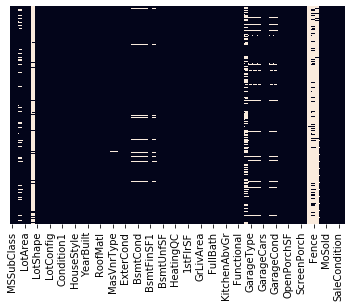

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
# see the null values

In [8]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [9]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage']).mean()

In [10]:
df.drop(['Alley'],axis=1,inplace=True)

In [11]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [12]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [13]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [14]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [15]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [16]:
df.shape

(1460, 75)

In [17]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [18]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

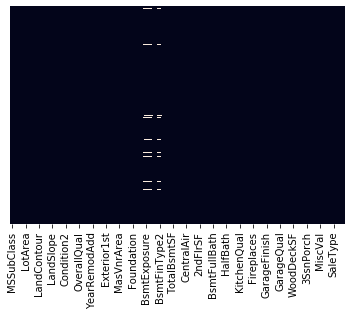

In [19]:
sns.heatmap(df.isnull(),yticklabels=False, cbar = False)

In [20]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

In [21]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [22]:
df.dropna(inplace=True)

In [23]:
df.shape

(1422, 75)

In [24]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,70.049958,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,70.049958,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,70.049958,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,70.049958,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,70.049958,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [25]:
datacorr = df.corr()

In [26]:
datacorr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000e+00,1.051263e-16,-1.399924e-01,3.619076e-02,-6.081395e-02,3.109267e-02,4.289803e-02,2.302985e-02,-6.888639e-02,-6.583125e-02,...,-1.399402e-02,-5.829832e-03,-1.803186e-02,-4.092795e-02,-2.564420e-02,8.603666e-03,-2.250565e-02,-1.706378e-02,-2.697627e-02,-8.447107e-02
LotFrontage,1.051263e-16,1.000000e+00,-3.600344e-16,-2.220999e-16,2.019191e-16,-3.130289e-15,2.732720e-15,-5.077112e-16,2.812652e-17,5.224675e-17,...,7.409629e-17,5.675885e-17,-1.881527e-16,3.133251e-16,-1.380806e-16,-1.128591e-15,8.950652e-18,3.530216e-16,5.304635e-15,7.903262e-17
LotArea,-1.399924e-01,-3.600344e-16,1.000000e+00,1.042755e-01,-6.499440e-03,1.295946e-02,9.579818e-03,1.031761e-01,2.140069e-01,1.105309e-01,...,1.708238e-01,8.245390e-02,-1.824687e-02,2.097232e-02,4.239283e-02,7.757634e-02,4.138451e-02,-1.318344e-03,-1.449793e-02,2.638151e-01
OverallQual,3.619076e-02,-2.220999e-16,1.042755e-01,1.000000e+00,-1.228995e-01,5.719836e-01,5.417704e-01,4.055683e-01,2.152125e-01,-7.127704e-02,...,2.277441e-01,3.024449e-01,-1.240638e-01,3.116490e-02,5.733925e-02,6.473657e-02,-2.572019e-02,6.687431e-02,-2.620679e-02,7.879851e-01
OverallCond,-6.081395e-02,2.019191e-16,-6.499440e-03,-1.228995e-01,1.000000e+00,-3.891933e-01,5.533532e-02,-1.327750e-01,-6.142384e-02,3.686540e-02,...,-1.171528e-02,-4.317936e-02,7.140296e-02,2.300031e-02,5.195067e-02,-2.981865e-03,7.085371e-02,-7.869959e-03,4.927328e-02,-9.547486e-02
YearBuilt,3.109267e-02,-3.130289e-15,1.295946e-02,5.719836e-01,-3.891933e-01,1.000000e+00,5.958319e-01,3.081519e-01,2.428163e-01,-5.297795e-02,...,2.228754e-01,1.887817e-01,-3.925150e-01,3.266393e-02,-5.401821e-02,4.165942e-03,-2.871485e-02,1.131638e-02,-1.411425e-02,5.190141e-01
YearRemodAdd,4.289803e-02,2.732720e-15,9.579818e-03,5.417704e-01,5.533532e-02,5.958319e-01,1.000000e+00,1.696266e-01,1.115543e-01,-7.570348e-02,...,1.969425e-01,2.214846e-01,-2.052104e-01,3.997437e-02,-4.557686e-02,4.462323e-03,-1.215280e-03,1.884450e-02,3.016608e-02,5.005117e-01
MasVnrArea,2.302985e-02,-5.077112e-16,1.031761e-01,4.055683e-01,-1.327750e-01,3.081519e-01,1.696266e-01,1.000000e+00,2.563720e-01,-7.480316e-02,...,1.572927e-01,1.203079e-01,-1.161992e-01,1.848758e-02,5.997617e-02,1.131129e-02,-2.690831e-02,-9.886589e-03,-4.928389e-03,4.701175e-01
BsmtFinSF1,-6.888639e-02,2.812652e-17,2.140069e-01,2.152125e-01,-6.142384e-02,2.428163e-01,1.115543e-01,2.563720e-01,1.000000e+00,-5.843108e-02,...,1.939075e-01,1.010662e-01,-1.057167e-01,2.834392e-02,5.575829e-02,1.405027e-01,8.741703e-03,-1.795007e-02,1.951849e-02,3.719867e-01
BsmtFinSF2,-6.583125e-02,5.224675e-17,1.105309e-01,-7.127704e-02,3.686540e-02,-5.297795e-02,-7.570348e-02,-7.480316e-02,-5.843108e-02,1.000000e+00,...,6.420229e-02,-6.610124e-04,3.678724e-02,-3.005846e-02,8.696862e-02,4.122771e-02,6.523267e-03,-1.591831e-02,3.359262e-02,-1.880461e-02


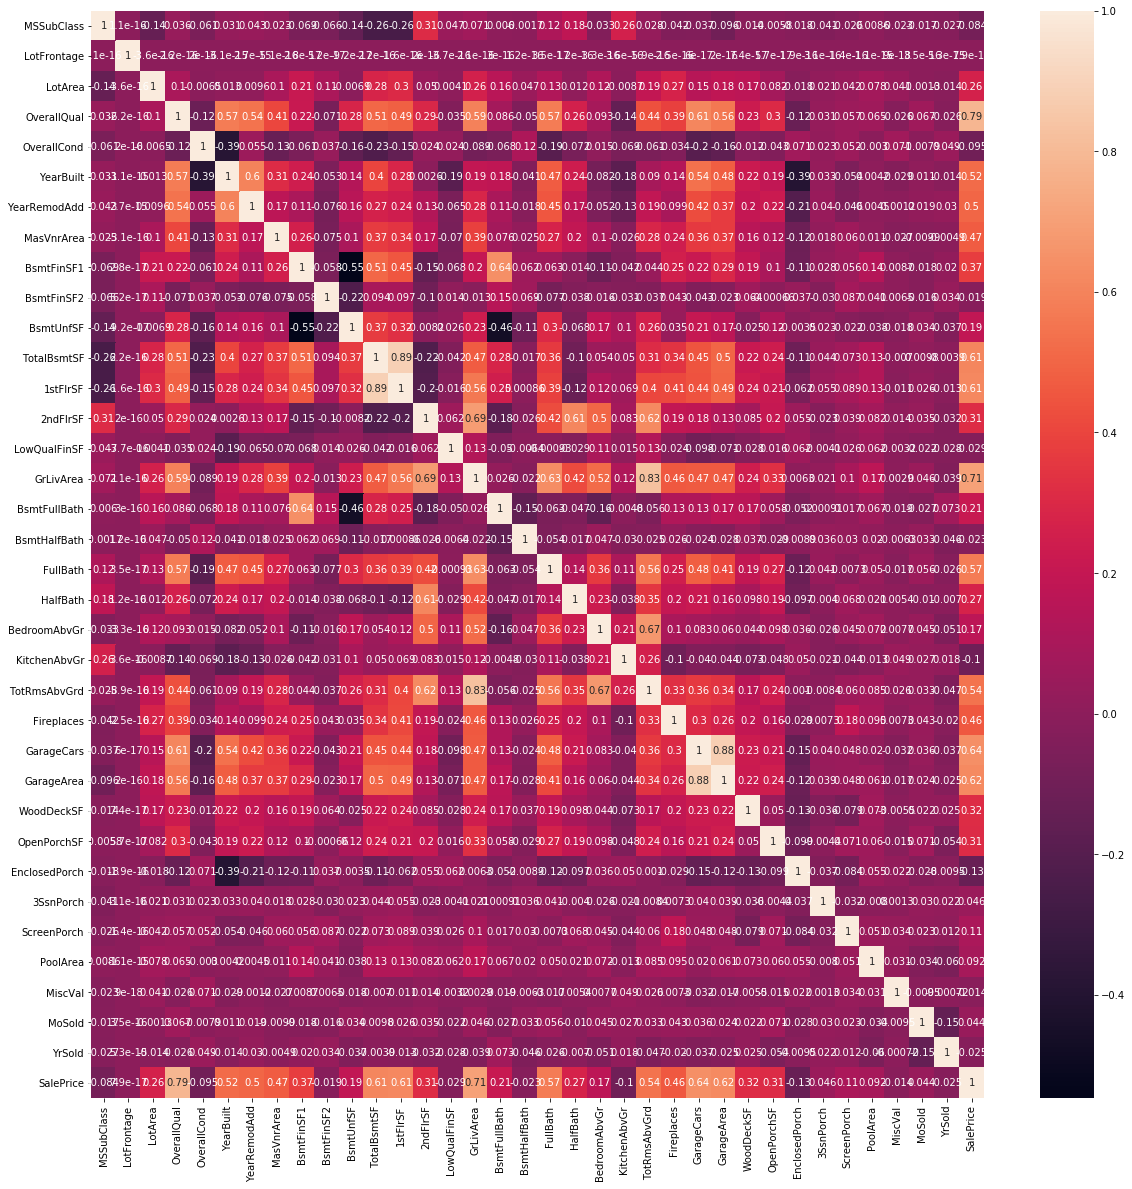

In [27]:
plt.figure(figsize = (20,20))
sns.heatmap(datacorr,annot = True)
plt.show()

In [28]:
# categorical feat 
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [29]:
len(columns)

39

In [30]:
def category_multcols(col):
    df_final = final_df
    i=0
    for fields in col:
        print(fields)
        df1 = pd.get_dummies(final_df[fields],drop_first=True)
        final_df.drop([fields],axis=1,inplace = True)
        if i==0:
            df_final = df1.copy()
        else:
            df_final = pd.concat([df_final,df1],axis=1)
        i=i+1
        
    df_final = pd.concat([final_df,df_final],axis =1)
    return df_final

# all the df concated with the categorical

In [31]:
main_df = df.copy()

In [32]:
test_df = pd.read_csv('formulatedtest.csv')

In [33]:
test_df.shape

(1459, 74)

In [34]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [35]:
# combine the train data with test data

In [36]:
final_df = pd.concat([df,test_df],axis = 0)

In [37]:
final_df.shape

(2881, 75)

In [38]:
final_df = category_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [39]:
final_df.shape

(2881, 235)

In [40]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]

# to remove duplicate columns 

In [41]:
final_df.shape

(2881, 175)

In [42]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,70.049958,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,70.049958,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,70.049958,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,70.049958,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,70.049958,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [43]:
df_Train = final_df.iloc[:1422,:]
df_Test = final_df.iloc[1422:,:]

In [44]:
df_Test.drop(['SalePrice'],axis=1,inplace = True)

C:\Users\aakriti aggarwal\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [45]:
df_Test.shape

(1459, 174)

In [46]:
x = df_Train.drop(['SalePrice'],axis=1)
y = df_Train['SalePrice']

In [48]:
import xgboost
classifier = xgboost.XGBRegressor()
classifier.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename,'wb'))

In [51]:
y_pred = classifier.predict(df_Test)

In [52]:
y_pred

array([128791.35, 149862.89, 189458.34, ..., 148058.38, 110372.06,
       230054.95], dtype=float32)

In [53]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'],pred],axis = 1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index = False)